In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

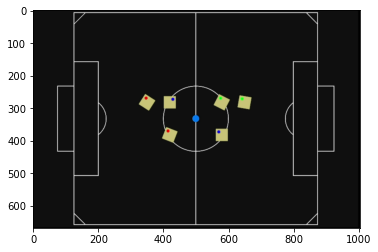

In [53]:
robots = cv2.imread('Robots.png')
plt.imshow(robots)
plt.show()

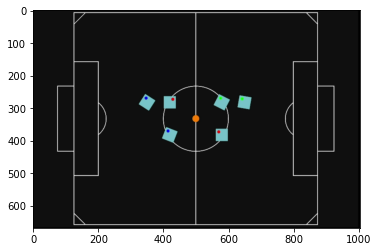

In [54]:
robots = cv2.cvtColor(robots, cv2.COLOR_BGR2RGB)
plt.imshow(robots)
plt.show()

In [55]:
hsv_robots = cv2.cvtColor(robots, cv2.COLOR_RGB2HSV)

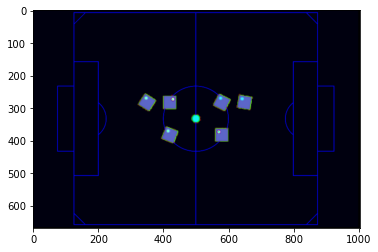

In [56]:
plt.imshow(hsv_robots)

# Robots Mask

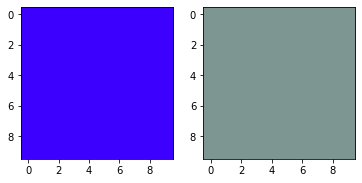

In [74]:
from matplotlib.colors import hsv_to_rgb

light_yellow = (120, 40, 150)
dark_yellow =  (180, 255, 255)

lo_square = np.full((10, 10, 3), light_yellow, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_yellow, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

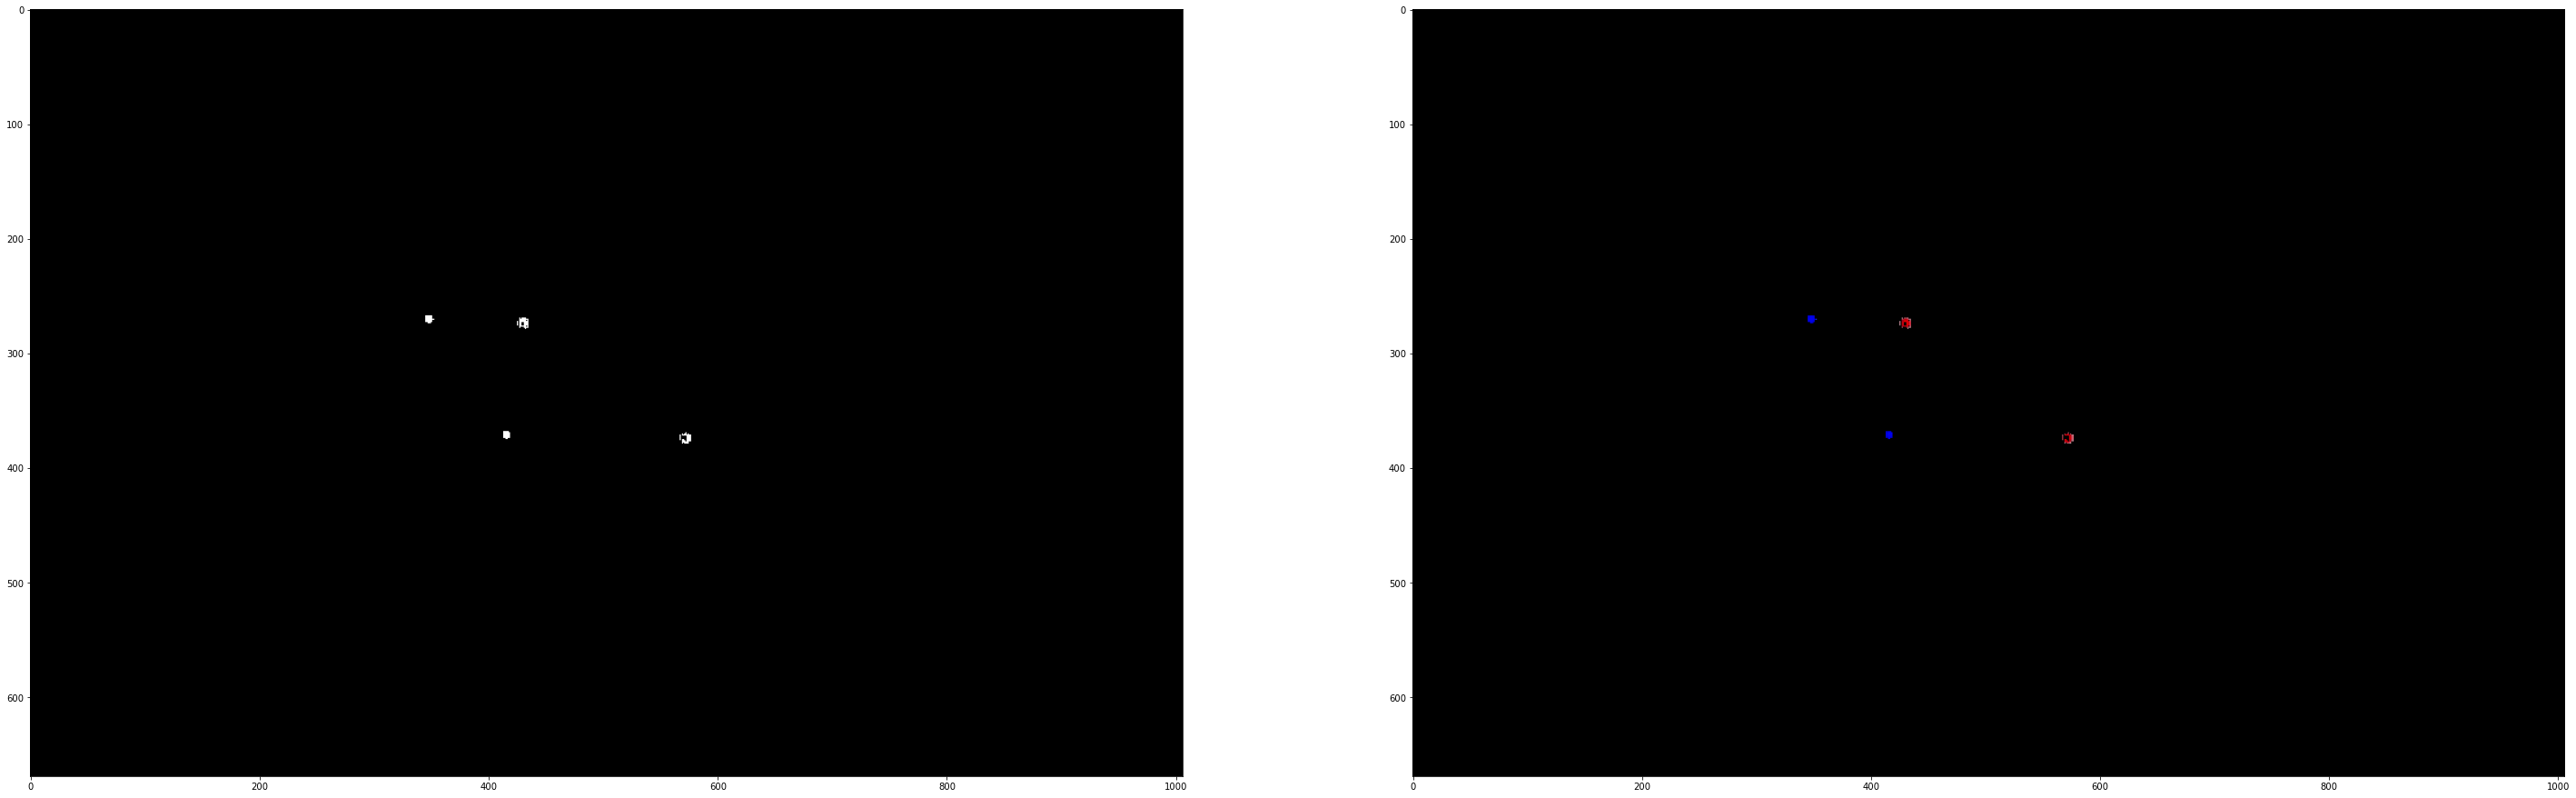

In [75]:
mask = cv2.inRange(hsv_robots, light_yellow, dark_yellow)

result = cv2.bitwise_and(robots, robots, mask=mask)
plt.figure(figsize=(50, 50))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

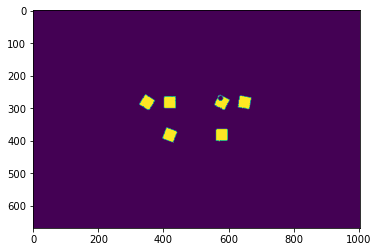

In [62]:
# Fill holes
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
filled_mask = mask
for pic, contour in enumerate(contours):
    cv2.fillPoly(filled_mask, pts=[contour], color=(255, 255, 255))

plt.imshow(filled_mask)      

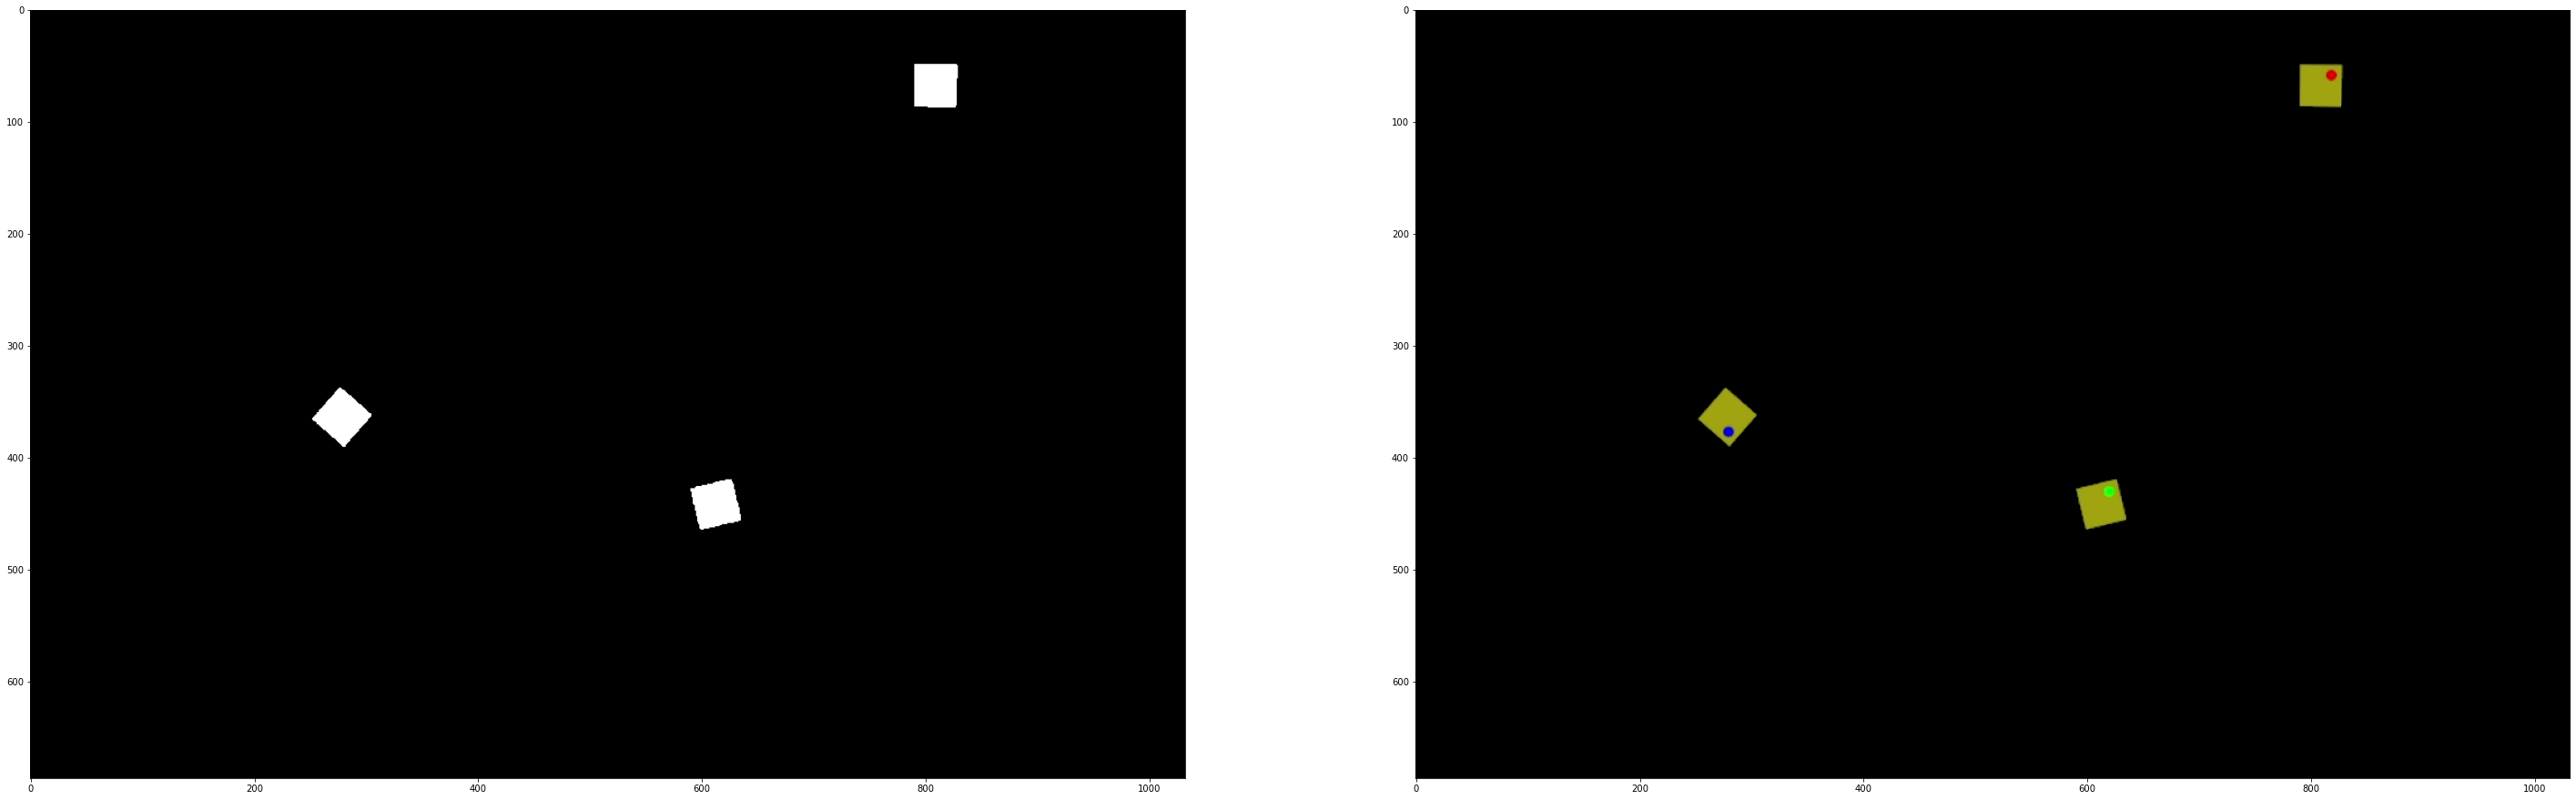

In [49]:
result = cv2.bitwise_and(robots, robots, mask=filled_mask)
plt.figure(figsize=(50, 50))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()